In [83]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import dot,sum
from numpy.linalg import inv

# #Build a logistic regression model to predict whether a student gets admitted into a university

In [86]:
class LogisticRegression:
    def __init__(self,name):
      self.file = name
    
    def addOnes(X):
      n = X.shape[0]
      ones = np.ones(n).reshape(n,1)
      return np.concatenate((ones,X),1)

    def load(self):
        self.data = pd.read_csv(self.file,header=None,
                                names = ["score1", "score2","outcome"])
        self.X = np.array([self.data['score1'],self.data['score2']], dtype=np.float64).reshape(lr.data['score1'].size,2) 
        self.y = np.array([self.data['outcome']], dtype=np.float64).reshape(lr.data['score1'].size,1) 
    
    def plotData(self):
        positive = self.data[self.data['outcome']==1]
        negative = self.data[self.data['outcome']==0]
        #self.positive
        plt.scatter(positive["score1"],positive["score2"], marker='o', color='b')
        plt.scatter(negative["score1"],negative["score2"], marker='x', color='r')

# Visualizing the data

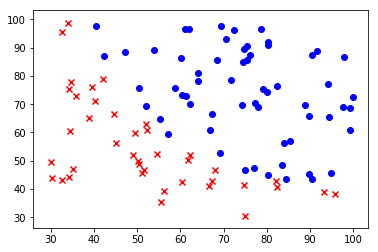

In [88]:
lr = LogisticRegression("ex2data1.txt")
lr.load()
lr.plotData()
